This is the start of Text Mining and Natural Language Processing

2.3 Text Mining and doctoral dissertations

Process the text from a batch of theses and use TF-IDF and cosine to assess
similarity between the documents. Try to train and use a bigram and a 3-
gram model on a relevant part of the dataset. What do you observe in terms
of computing time ? Could you use these n-grams to assess automatically the
topic or the field of the PhD ?


In [1]:
#Importing
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
# Step 1: Load French stopwords
try:
    stop_words = stopwords.words('french')
except LookupError:
    import nltk
    nltk.download('stopwords')
    stop_words = stopwords.words('french')

In [3]:
# Step 2: Load text files
directory = "H:/Documents/NLP/Tel_text"  # Replace with your folder path
documents = []
file_names = []

for file in os.listdir(directory):
    if file.endswith(".txt"):
        file_names.append(file)
        with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
            documents.append(f.read())

In [4]:
# Step 3: Preprocess and compute TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [5]:
# Step 4: Compute cosine similarity
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

In [6]:
cosine_similarity = pd.DataFrame.from_records(cosine_sim_matrix)

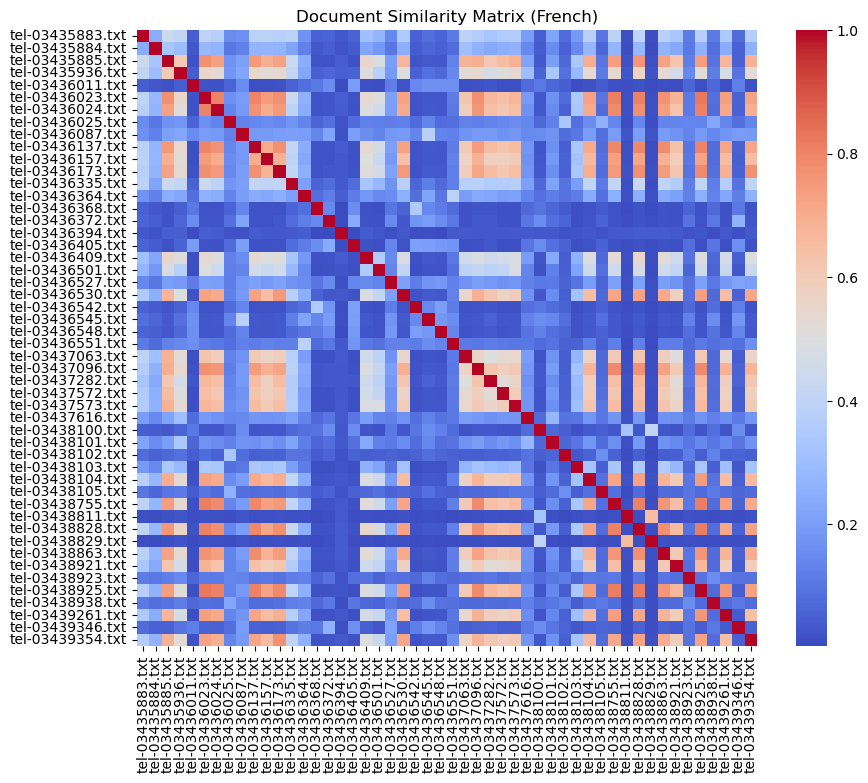

In [7]:
# Step 5: Visualize similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, xticklabels=file_names, yticklabels=file_names, cmap='coolwarm', annot=False)
plt.title('Document Similarity Matrix (French)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [8]:
# Step 6: Export results (optional)
np.savetxt("similarity_matrix_french.csv", cosine_sim_matrix, delimiter=",", fmt="%.4f")

FORCED DIRECTED GRAPH


A force-directed graph is a great way to visualize relationships between documents based on their similarity scores. Each document is represented as a node, and the edges between nodes are weighted by similarity. The closer two nodes are, the more similar the documents they represent.

Here’s how you can approach this:

Which Metric to Use for the Force-Directed Graph


Cosine Similarity: Use the similarity scores computed with TF-IDF. Each score in the similarity matrix (excluding diagonal elements, which are always 1.0) represents the strength of the relationship between two documents.

Thresholding: Only create edges between nodes if the similarity score exceeds a certain threshold (e.g., 0.3). This prevents the graph from being too cluttered.

Since we already computed the cosine similarity, we can go to the next metric, using threshold

In [1]:
#Importing packages 
import os
import networkx as nx

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from pyvis.network import Network

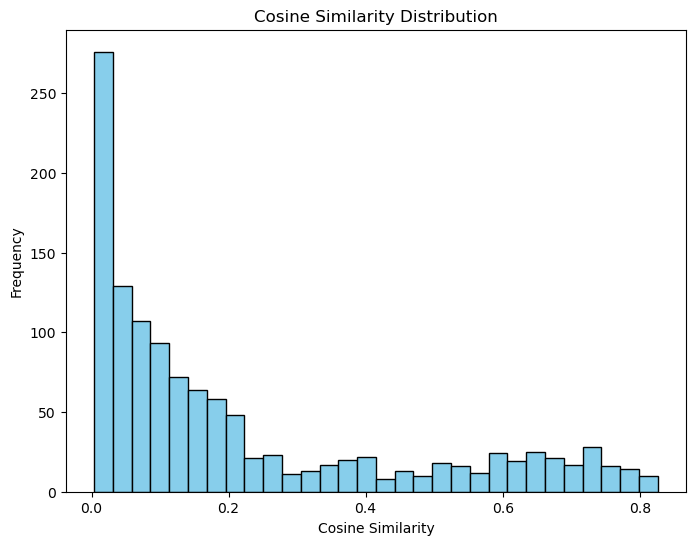

In [11]:

import matplotlib.pyplot as plt

# Flatten the cosine similarity matrix (excluding the diagonal)
similarities = cosine_sim_matrix[np.triu_indices_from(cosine_sim_matrix, k=1)]

# Plot histogram of similarities
plt.figure(figsize=(8, 6))
plt.hist(similarities, bins=30, color='skyblue', edgecolor='black')
plt.title("Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()


In [12]:
# Step 1: Build graph
threshold = 0.1  # Adjust the threshold as needed
G = nx.Graph()

In [13]:
# Add nodes
for i, file_name in enumerate(file_names):
    G.add_node(i, label=file_name)

In [14]:
# Add edges based on similarity
for i in range(len(file_names)):
    for j in range(i + 1, len(file_names)):  # Avoid duplicate edges
        if cosine_sim_matrix[i, j] > threshold:
            G.add_edge(i, j, weight=cosine_sim_matrix[i, j])

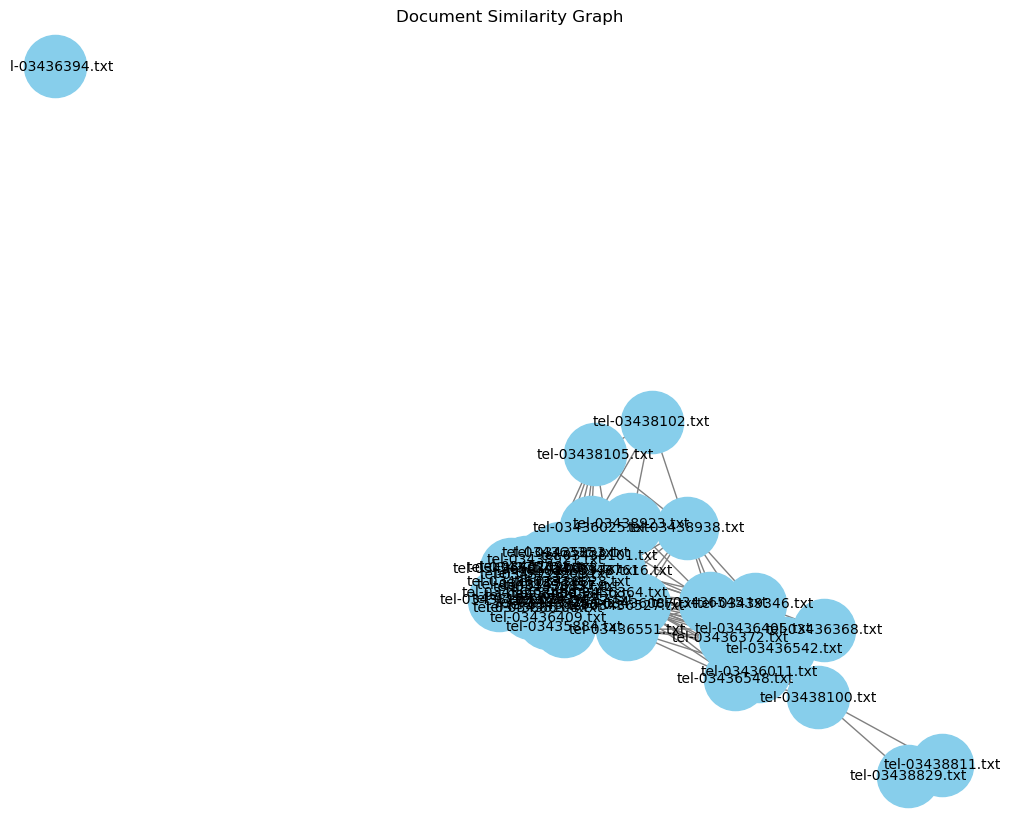

In [15]:
# Step 5: Visualize graph using pyvis
import matplotlib.pyplot as plt
import networkx as nx

# Assuming the graph `G` is already created
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Force-directed layout
nx.draw(
    G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
    node_color="skyblue", edge_color="gray", node_size=2000, font_size=10
)
plt.title("Document Similarity Graph")
plt.show()


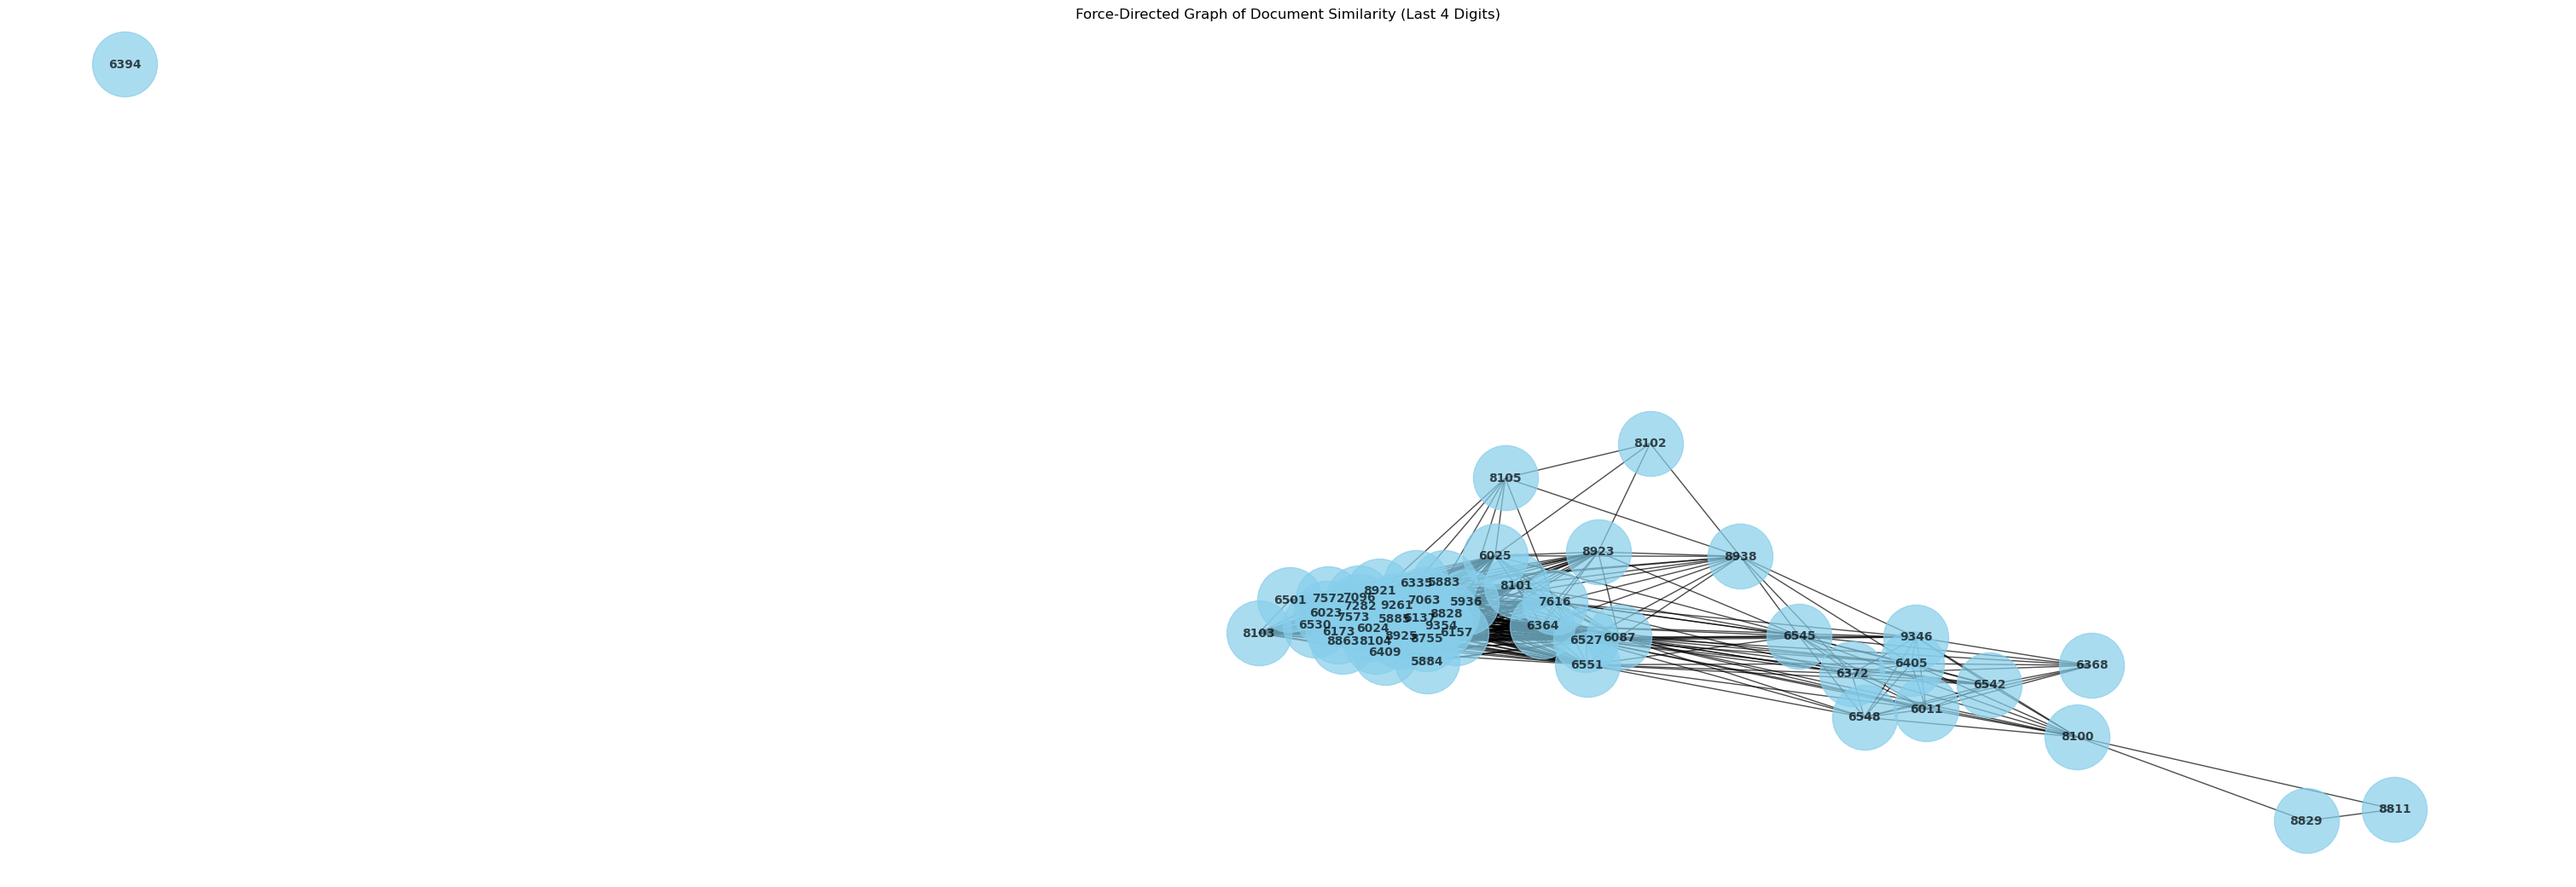

In [16]:
# Extract only the last 4 digits of each file name (ignoring the prefix 'tel-' and '.txt' extension)
short_labels = {i: file_names[i].split('-')[-1].split('.')[0][-4:] for i in range(len(file_names))}

# Update the graph with these shorter labels
plt.figure(figsize=(30,10 ))  # Increase the figure size for better clarity
pos = nx.spring_layout(G, seed=42)  # Force-directed layout

# Draw the graph with updated labels
nx.draw(
    G, pos, with_labels=True, labels=short_labels,
    node_color="skyblue", node_size=3000, font_size=10, font_weight='bold', font_color='black', alpha=0.7
)

plt.title("Force-Directed Graph of Document Similarity (Last 4 Digits)")
plt.axis('off')  # Hide axis for better aesthetics
plt.show()



Try to improve the forced directed graph

We will only look on the top 20 strongest correlations

Files found: ['Tel_text\\tel-03435883.txt', 'Tel_text\\tel-03435884.txt', 'Tel_text\\tel-03435885.txt', 'Tel_text\\tel-03435936.txt', 'Tel_text\\tel-03436011.txt', 'Tel_text\\tel-03436023.txt', 'Tel_text\\tel-03436024.txt', 'Tel_text\\tel-03436025.txt', 'Tel_text\\tel-03436087.txt', 'Tel_text\\tel-03436137.txt', 'Tel_text\\tel-03436157.txt', 'Tel_text\\tel-03436173.txt', 'Tel_text\\tel-03436335.txt', 'Tel_text\\tel-03436364.txt', 'Tel_text\\tel-03436368.txt', 'Tel_text\\tel-03436372.txt', 'Tel_text\\tel-03436394.txt', 'Tel_text\\tel-03436405.txt', 'Tel_text\\tel-03436409.txt', 'Tel_text\\tel-03436501.txt', 'Tel_text\\tel-03436527.txt', 'Tel_text\\tel-03436530.txt', 'Tel_text\\tel-03436542.txt', 'Tel_text\\tel-03436545.txt', 'Tel_text\\tel-03436548.txt', 'Tel_text\\tel-03436551.txt', 'Tel_text\\tel-03437063.txt', 'Tel_text\\tel-03437096.txt', 'Tel_text\\tel-03437282.txt', 'Tel_text\\tel-03437572.txt', 'Tel_text\\tel-03437573.txt', 'Tel_text\\tel-03437616.txt', 'Tel_text\\tel-03438100.tx

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_16472\1463119650.py:76: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G_sub, pos, edge_color=edge_colors, width=edge_widths, edge_cmap=cmap, alpha=0.7)


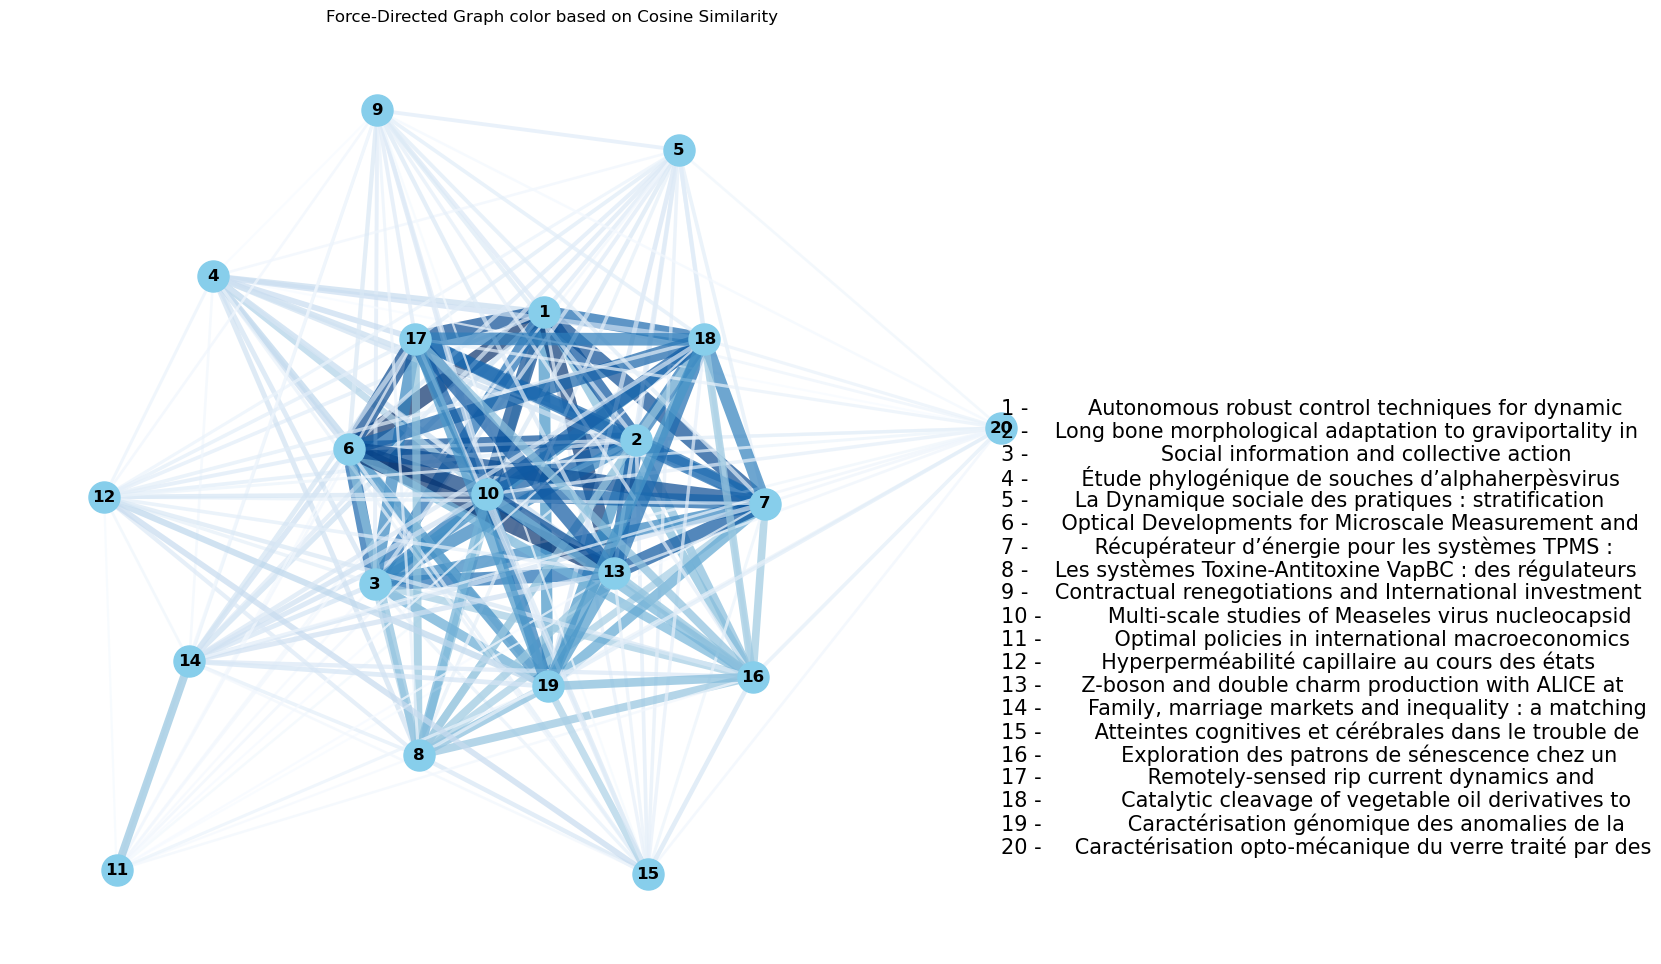

In [17]:
import glob
import networkx as nx
import matplotlib.pyplot as plt

def extract_title(content):
    # Example: Extract the first line as the title
    return content.splitlines()[0] if content else "No Title"

# Absolute path to search all text files inside a specific folder
path = r'Tel_text/*.txt'

# Get a list of all text files in the folder
txt_files = glob.glob(path)
print("Files found:", txt_files)

# Dictionary mapping file names to their titles
file_to_title = {}
for file in txt_files:
    try:
        with open(file, "r", encoding="utf-8") as f:
            content = f.read()
            # Assuming extract_title function processes the content and extracts the title
            file_to_title[file] = extract_title(content)
    except FileNotFoundError:
        print(f"Warning: File not found - {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes using titles instead of file names
for file in txt_files:
    title = file_to_title.get(file, "Unknown Title")  # Default to "Unknown Title" if no title is found
    G.add_node(title)

# Add edges based on cosine similarity (threshold can be adjusted)
threshold = 0.1  # You can adjust this value to control the sparsity of the graph
for i in range(len(txt_files)):
    for j in range(i + 1, len(txt_files)):
        if cosine_sim_matrix[i, j] > threshold:  # If similarity is above threshold, add an edge
            G.add_edge(file_to_title[txt_files[i]], file_to_title[txt_files[j]], weight=cosine_sim_matrix[i, j])

# Find the 10 most connected nodes (nodes with the highest degree)
node_degrees = dict(G.degree())  # Get the degree (number of connections) for each node
sorted_nodes_by_degree = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)  # Sort by degree

# Select top 10 most connected nodes
top_n_titles = [node for node, degree in sorted_nodes_by_degree[:20]]

# Create a subgraph with only the selected top 10 nodes
G_sub = G.subgraph(top_n_titles).copy()

# Assign numbers to the nodes that are part of the subgraph
node_labels = {node: str(i + 1) for i, node in enumerate(G_sub.nodes)}

# Prepare positions for nodes in the subgraph
pos = nx.spring_layout(G_sub, seed=42)

# Draw the graph
plt.figure(figsize=(14, 12))

# Draw nodes with reduced size
nx.draw_networkx_nodes(G_sub, pos, node_size=500, node_color="skyblue")

# Get the edge weights (cosine similarity scores) for coloring edges
edge_colors = [G_sub[u][v]['weight'] for u, v in G_sub.edges()]
# Scale the width of edges based on the weight (cosine similarity)
edge_widths = [G_sub[u][v]['weight'] * 15 for u, v in G_sub.edges()]  # Scaling factor of 10 (adjust as needed)

# Normalize edge colors to a range from 0 to 1
norm = plt.Normalize(min(edge_colors), max(edge_colors))
cmap = plt.get_cmap('Blues')  # Color map for the heatmap effect

# Draw edges with colors based on cosine similarity and width based on weight
nx.draw_networkx_edges(G_sub, pos, edge_color=edge_colors, width=edge_widths, edge_cmap=cmap, alpha=0.7)

# Draw labels with numbers (1, 2, 3, etc.)
nx.draw_networkx_labels(G_sub, pos, labels=node_labels, font_size=12, font_weight="bold")

# Adjust the layout for the titles outside the plot
x_offset = 1# Adjust this to move the text further right or left
y_offset = 0.2  # You can also adjust the vertical positioning here

for i, title in enumerate(G_sub.nodes):  # Loop through nodes in the subgraph
    # Find corresponding node number
    node_num = node_labels[title]
    plt.text(x_offset, y_offset - 0.05 * i, f"{node_num} - {title}", fontsize=15, ha="left", va="center")


plt.title(f"Force-Directed Graph color based on Cosine Similarity")

# Remove axes and the frame (spines) around the plot
plt.axis("off")
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the plot
plt.show()

Try to train and use a bigram and a 3-
gram model on a relevant part of the dataset.

1. Preprocessing

In [ ]:
import os
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Ensure that required NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')

# Define the folder where your text files are located
folder_path = 'H:/Documents/NLP/Tel_text'  # Replace with the path to your folder

# Function to read all text files in the folder and store them as a list
def load_text_files(folder_path):
    texts = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
    return texts

# Load the texts from the folder
document_texts = load_text_files(folder_path)

# Preprocess text (tokenization and removing stopwords and punctuation)
stop_words = set(stopwords.words('french'))  # Assuming text is in French
punctuation = string.punctuation

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Lowercase and tokenize
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    return tokens

# Preprocess the document texts
preprocessed_texts = [preprocess_text(text) for text in document_texts]


[nltk_data] Downloading package punkt to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


a> Without TD-IDF

In [ ]:
import os
from nltk.util import ngrams
from collections import Counter
import nltk
import string

# Make sure you have the necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to preprocess the text (tokenize and remove stopwords)
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('french'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# Function to extract and display top 5 bigrams and trigrams
def get_top_ngrams(text, n=2, top_k=5):
    # Preprocess the text
    tokens = preprocess_text(text)
    
    # Generate n-grams
    n_grams = list(ngrams(tokens, n))
    
    # Count the frequency of n-grams
    ngram_freq = Counter(n_grams)
    
    # Get the top_k most common n-grams
    top_ngrams = ngram_freq.most_common(top_k)
    
    return top_ngrams

# Define the folder containing the text files
folder_path = 'H:/Documents/NLP/Tel_text'  # Update this path to your folder

# Iterate over each text file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        
        # Get top 5 bigrams
        top_bigrams = get_top_ngrams(text, n=2, top_k=5)
        print(f"Top 5 Bigrams for {filename}:")
        for bigram, freq in top_bigrams:
            print(f"{' '.join(bigram)}: {freq}")
        
        # Get top 5 trigrams
        top_trigrams = get_top_ngrams(text, n=3, top_k=5)
        print(f"Top 5 Trigrams for {filename}:")
        for trigram, freq in top_trigrams:
            print(f"{' '.join(trigram)}: {freq}")
        
        print("-" * 50)


[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 5 Bigrams for tel-03435883.txt:
of the: 276
in the: 195
type ii: 100
vapc3 vapc7: 87
to the: 80
Top 5 Trigrams for tel-03435883.txt:
capacité fixatrice azote: 43
systèmes type ii: 41
a b figure: 33
mutants vapc3 vapc7: 31
this work dérivé: 30
--------------------------------------------------
Top 5 Bigrams for tel-03435884.txt:
of the: 386
equine herpesvirus: 265
a a: 226
horse sample: 190
lung horse: 176
Top 5 Trigrams for tel-03435884.txt:
lung horse sample: 172
liver lung horse: 141
of equine herpesvirus: 106
neg neg neg: 106
chapitre contexte scientifique: 100
--------------------------------------------------
Top 5 Bigrams for tel-03435885.txt:
of the: 636
in the: 397
can be: 222
phase separation: 188
to the: 184
Top 5 Trigrams for tel-03435885.txt:
in order to: 42
the presence of: 40
of the protein: 39
in the presence: 29
of phase separation: 28
--------------------------------------------------
Top 5 Bigrams for tel-03435936.txt:
of the: 211
in the: 121
mutations in: 67
jour

KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
from nltk.util import ngrams
from collections import Counter
import nltk
import string

# Make sure you have the necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Combining English and French stopwords
stop_words = set(stopwords.words('english')) | set(stopwords.words('french'))

# Function to preprocess the text (tokenize and remove stopwords)
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    return tokens

# Function to extract top 5 bigrams and trigrams from a text
def get_top_ngrams(text, n=2, top_k=5):
    # Preprocess the text
    tokens = preprocess_text(text)
    
    # Generate n-grams
    n_grams = list(ngrams(tokens, n))
    
    # Count the frequency of n-grams
    ngram_freq = Counter(n_grams)
    
    # Get the top_k most common n-grams
    top_ngrams = ngram_freq.most_common(top_k)
    
    return top_ngrams

# Define the folder containing the text files
folder_path = 'H:/Documents/NLP/Tel_text'  # Update this path to your folder

# Initialize an empty list to store results
results = []

# Iterate over each text file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        
        # Get top 5 bigrams
        top_bigrams = get_top_ngrams(text, n=2, top_k=5)
        
        # Get top 5 trigrams
        top_trigrams = get_top_ngrams(text, n=3, top_k=5)
        
        # Store the results in a list
        results.append({
            'filename': filename,
            'top_bigrams': top_bigrams,
            'top_trigrams': top_trigrams
        })

# Convert results into a pandas DataFrame for better visualization
df = pd.DataFrame(results)

# Optionally, you can store this DataFrame as a CSV or Excel file
df.to_csv('ngrams_results.csv', index=False)

# Display the DataFrame
print(df)


[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


            filename                                        top_bigrams  \
0   tel-03435883.txt  [((type, ii), 104), ((vapc3, vapc7), 90), ((fi...   
1   tel-03435884.txt  [((equine, herpesvirus), 265), ((g, g), 217), ...   
2   tel-03435885.txt  [((phase, separation), 188), ((measles, virus)...   
3   tel-03435936.txt  [((hypomelanosis, ito), 57), ((medical, geneti...   
4   tel-03436011.txt  [((science, politique), 407), ((thèse, doctora...   
5   tel-03436023.txt  [((thèse, doctorat), 162), ((liu, chang), 161)...   
6   tel-03436024.txt  [((cross, section), 152), ((z, bosons), 85), (...   
7   tel-03436025.txt  [((échange, ionique), 84), ((verre, brut), 68)...   
8   tel-03436087.txt  [((marie, plessz), 340), ((sociale, pratiques)...   
9   tel-03436137.txt  [((h, x), 146), ((x, x), 144), ((hydrodynamic,...   
10  tel-03436157.txt  [((optical, flow), 148), ((surf, zone), 96), (...   
11  tel-03436173.txt  [((trade, flows), 160), ((ø, ø), 157), ((news,...   
12  tel-03436335.txt  [((

In [ ]:
# Save the DataFrame as an Excel file
df.to_excel('ngrams_results.xlsx', index=False)

print("Data saved as 'ngrams_results.xlsx'")


Data saved as 'ngrams_results.xlsx'


b> With TF-IDF

In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Make sure you have the necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to preprocess the text (tokenize and remove stopwords)
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    
    # Combine English and French stopwords
    stop_words = set(stopwords.words('french')) | set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# Define the folder containing the text files
folder_path = 'H:/Documents/NLP/Tel_text'  # Update this path to your folder

# Read all files in the folder and preprocess them
documents = []
file_names = []
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        
        documents.append(text)
        file_names.append(filename)

# Combine stopwords for English and French and convert to list
stop_words = list(set(stopwords.words('french')) | set(stopwords.words('english')))

# Initialize the TF-IDF Vectorizer for bigrams
vectorizer_bigram = TfidfVectorizer(ngram_range=(2, 2), stop_words=stop_words)

# Initialize the TF-IDF Vectorizer for trigrams
vectorizer_trigram = TfidfVectorizer(ngram_range=(3, 3), stop_words=stop_words)

# Fit and transform the documents using the TF-IDF Vectorizer for bigrams
tfidf_matrix_bigram = vectorizer_bigram.fit_transform(documents)
# Fit and transform the documents using the TF-IDF Vectorizer for trigrams
tfidf_matrix_trigram = vectorizer_trigram.fit_transform(documents)

# Get the feature names (i.e., the n-grams) for both bigrams and trigrams
ngram_features_bigram = vectorizer_bigram.get_feature_names_out()
ngram_features_trigram = vectorizer_trigram.get_feature_names_out()

# Initialize a list to store the top 5 n-grams for each document
top_ngrams_list = []

# Iterate through the TF-IDF matrix and get the top 5 bigrams and trigrams for each document
for i, filename in enumerate(file_names):
    # Get the TF-IDF scores for the bigrams and trigrams
    tfidf_scores_bigram = tfidf_matrix_bigram[i].toarray().flatten()
    tfidf_scores_trigram = tfidf_matrix_trigram[i].toarray().flatten()

    # Get the top 5 bigrams based on TF-IDF scores
    top_bigrams = sorted(zip(ngram_features_bigram, tfidf_scores_bigram), key=lambda x: x[1], reverse=True)[:5]
    # Get the top 5 trigrams based on TF-IDF scores
    top_trigrams = sorted(zip(ngram_features_trigram, tfidf_scores_trigram), key=lambda x: x[1], reverse=True)[:5]
    
    # Store the results
    top_ngrams_list.append({
        'filename': filename,
        'top_bigrams': top_bigrams,
        'top_trigrams': top_trigrams
    })

# Convert the results into a DataFrame
df = pd.DataFrame(top_ngrams_list)

# Save the results to an Excel file
df.to_excel('top_ngrams_tfidf_both_stopwords_separate.xlsx', index=False)

# Display the DataFrame
print(df)


[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


            filename                                        top_bigrams  \
0   tel-03435883.txt  [(toxin antitoxin, 0.29942121737867206), (vapc...   
1   tel-03435884.txt  [(doi 10, 0.3161653743448489), (equine herpesv...   
2   tel-03435885.txt  [(phase separation, 0.3890482445920951), (sars...   
3   tel-03435936.txt  [(hypomelanosis ito, 0.14640979243987462), (me...   
4   tel-03436011.txt  [(amandine thèse, 0.3794913027344644), (brizio...   
5   tel-03436023.txt  [(chang thèse, 0.4150317081385025), (doctorat ...   
6   tel-03436024.txt  [(cross section, 0.2961193148720585), (pb pb, ...   
7   tel-03436025.txt  [(échange ionique, 0.3128862177239155), (figur...   
8   tel-03436087.txt  [(marie plessz, 0.4034915023481239), (dynamiqu...   
9   tel-03436137.txt  [(hydrodynamic limit, 0.2810599657153366), (ga...   
10  tel-03436157.txt  [(optical flow, 0.3263198308914663), (surf zon...   
11  tel-03436173.txt  [(trade flows, 0.3038060160640291), (news agen...   
12  tel-03436335.txt  [(c

Observations on Computing Time
Computing Time:
The computation of TF-IDF for bigrams and trigrams across multiple text files is relatively time-intensive. This is due to the combination of preprocessing (tokenization, stopword removal), vectorization, and calculating the term frequencies and inverse document frequencies for the n-grams.
The time increases with:
The number of files.
The size and complexity of the text in each file.
The size of the n-gram range (bigrams/trigrams produce a significantly larger vocabulary compared to unigrams).
Optimizations, such as reducing the dimensionality of the vocabulary (e.g., filtering n-grams by frequency thresholds) or parallelizing computations, could help reduce the processing time.

2.4 POS-tagging and exercise generation

You are provided with a corpus of sentences in different languages. Two Python
libraries can be used for the following tasks : spaCy and stanza.
Design a strategy to automatically create the necessary data for MCQ exercises (target language is English) with the following goals :


1. identify 1 to 3 nouns in the sentences (among 4 words of the sentence)

In [ ]:
import pandas as pd
import spacy

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# File path to your dataset
file_path = "H:/Documents/NLP/7000 sentences Corpus with IDs.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

# Extract the English sentences from the column (adjust column name if needed)
english_sentences = data['English']  # Adjust if your column name is different

# Function to extract nouns
def extract_nouns(sentence):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Extract nouns (filtering by part of speech)
    nouns = [token.text for token in doc if token.pos_ == "NOUN"]
    
    # Select 1 to 3 nouns from the sentence
    return nouns[:3]

# Process each sentence and extract nouns
nouns_data = []
for sentence in english_sentences:
    try:
        nouns = extract_nouns(sentence)
        nouns_data.append({"sentence": sentence, "nouns": nouns})
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")

# Convert the results to a DataFrame
nouns_df = pd.DataFrame(nouns_data)

# Save the results to an Excel file
output_path = "H:/Documents/NLP/nouns_extract.xlsx"
nouns_df.to_excel(output_path, index=False)

print(f"Noun data saved to {output_path}")


Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Noun data saved to H:/Documents/NLP/nouns_extract.xlsx


2. identify 1 to 3 pronouns in the sentences (among 4 words of the sentence)

In [ ]:
import pandas as pd
import spacy

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# File path to your dataset
file_path = "H:/Documents/NLP/7000 sentences Corpus with IDs.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

# Extract the English sentences from the column (adjust column name if needed)
english_sentences = data['English']  # Adjust if your column name is different

# Function to extract pronouns
def extract_pronouns(sentence):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Extract pronouns (filtering by part of speech)
    pronouns = [token.text for token in doc if token.pos_ == "PRON"]
    
    # Select 1 to 3 pronouns from the sentence
    return pronouns[:3]

# Process each sentence and extract pronouns
pronouns_data = []
for sentence in english_sentences:
    try:
        pronouns = extract_pronouns(sentence)
        pronouns_data.append({"sentence": sentence, "pronouns": pronouns})
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")

# Convert the results to a DataFrame
pronouns_df = pd.DataFrame(pronouns_data)

# Save the results to an Excel file
output_path = "H:/Documents/NLP/pronouns_extract.xlsx"
pronouns_df.to_excel(output_path, index=False)

print(f"Pronoun data saved to {output_path}")


Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Pronoun data saved to H:/Documents/NLP/pronouns_extract.xlsx


Design a strategy to automatically create the necessary data for MCQ exercises (target language is German, for instance) with the following goals:


1. identify the gender of a noun

In [ ]:
download("de_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy

# Load the spaCy model for German
nlp = spacy.load("de_core_news_sm")

# File path to your dataset
file_path = "H:/Documents/NLP/7000 sentences Corpus with IDs.xlsx"

# Load the dataset (adjust the path and column name if necessary)
data = pd.read_excel(file_path)
german_sentences = data['German']  # Adjust column name as needed

# Function to extract nouns and their gender
def extract_nouns_and_gender(sentence):
    doc = nlp(sentence)
    nouns_and_gender = []
    
    for token in doc:
        if token.pos_ == "NOUN":  # Filter for nouns
            gender = token.morph.get("Gender")  # Get the gender attribute
            if gender:  # Only include nouns with gender information
                nouns_and_gender.append({"noun": token.text, "gender": gender[0]})
    
    return nouns_and_gender

# Process each sentence and extract nouns with their genders
nouns_gender_data = []

for sentence in german_sentences:
    try:
        nouns_and_gender = extract_nouns_and_gender(sentence)
        for item in nouns_and_gender:
            nouns_gender_data.append({"sentence": sentence, "noun": item["noun"], "gender": item["gender"]})
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")

# Convert the results to a DataFrame
nouns_gender_df = pd.DataFrame(nouns_gender_data)

# Save the results to an Excel file
output_path = "H:/Documents/NLP/nouns_gender_detection.xlsx"
nouns_gender_df.to_excel(output_path, index=False)

print(f"Gender detection results saved to {output_path}")


Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Gender detection results saved to H:/Documents/NLP/nouns_gender_detection.xlsx


2. identify the case of a noun

In [ ]:
import pandas as pd
import spacy

# Load the spaCy model for German
nlp = spacy.load("de_core_news_sm")

# File path to your dataset
file_path = "H:/Documents/NLP/7000 sentences Corpus with IDs.xlsx"

# Load the dataset (adjust the path and column name if necessary)
data = pd.read_excel(file_path)
german_sentences = data['German']  # Adjust column name as needed

# Function to extract nouns with gender and case
def extract_nouns_gender_case(sentence):
    doc = nlp(sentence)
    nouns_info = []
    
    for token in doc:
        if token.pos_ == "NOUN":  # Filter for nouns
            gender = token.morph.get("Gender")  # Get the gender attribute
            case = token.morph.get("Case")     # Get the case attribute (e.g., nominative, accusative)
            
            if gender and case:  # Include only nouns with gender and case information
                nouns_info.append({
                    "noun": token.text,
                    "gender": gender[0],
                    "case": case[0]
                })
    
    return nouns_info

# Process each sentence and extract nouns with gender and case
nouns_gender_case_data = []

for sentence in german_sentences:
    try:
        nouns_info = extract_nouns_gender_case(sentence)
        for item in nouns_info:
            nouns_gender_case_data.append({
                "sentence": sentence,
                "noun": item["noun"],
                "gender": item["gender"],
                "case": item["case"]
            })
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")

# Convert the results to a DataFrame
nouns_gender_case_df = pd.DataFrame(nouns_gender_case_data)

# Save the results to an Excel file
output_path = "H:/Documents/NLP/nouns_gender_case_detection.xlsx"
nouns_gender_case_df.to_excel(output_path, index=False)

print(f"Gender and case detection results saved to {output_path}")


Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Gender and case detection results saved to H:/Documents/NLP/nouns_gender_case_detection.xlsx


Give the instructor a set of 20 automatically generated exercises, using spaCy
tags, and create the appropriate structure for the database. To delve into the
topic, search for the NLP for BEA (Building Educational Applications) community. You can compare your work with what ChatGPT is able to do.

For English:

In [ ]:
import pandas as pd
import spacy
import random

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# File path to your dataset
file_path = "H:/Documents/NLP/7000 sentences Corpus with IDs.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

# Extract the English sentences from the column (adjust column name if needed)
english_sentences = data['English']  # Adjust if your column name is different

# Function to extract nouns
def extract_nouns(sentence):
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Extract nouns (filtering by part of speech)
    nouns = [token.text for token in doc if token.pos_ == "NOUN"]
    
    # Select 1 to 3 nouns from the sentence
    return nouns[:3]

# Function to generate MCQs for a given sentence
def generate_mcq(sentence, nouns, all_nouns):
    if not nouns:
        return None  # Skip if no nouns are found
    
    # Select one noun to be the correct answer
    correct_answer = random.choice(nouns)
    
    # Generate distractors
    distractors = random.sample([n for n in all_nouns if n != correct_answer], 3)
    
    # Combine correct answer with distractors and shuffle
    options = distractors + [correct_answer]
    random.shuffle(options)
    
    # Replace the correct noun in the sentence with a blank
    mcq_sentence = sentence.replace(correct_answer, "_____")
    
    return {
        "question": mcq_sentence,
        "options": options,
        "correct_answer": correct_answer
    }

# Extract nouns and generate MCQs
all_nouns = []  # Collect all nouns for distractor generation
mcq_data = []

for sentence in english_sentences:
    try:
        nouns = extract_nouns(sentence)
        all_nouns.extend(nouns)
        mcq = generate_mcq(sentence, nouns, all_nouns)
        if mcq:
            mcq_data.append(mcq)
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")

# Convert the MCQs to a DataFrame
mcq_df = pd.DataFrame(mcq_data)

# Save the MCQs to an Excel file
output_path = "H:/Documents/NLP/mcq_generated.xlsx"
mcq_df.to_excel(output_path, index=False)

print(f"MCQs saved to {output_path}")


Error processing sentence: The beauty of the landscape struck the travellers.. Error: Sample larger than population or is negative
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
MCQs saved to H:/Documents/NLP/mcq_generated.xlsx


For German

In [ ]:
import pandas as pd
import spacy
import random

# Load the spaCy model for German
nlp = spacy.load("de_core_news_sm")

# File path to your dataset
file_path = "H:/Documents/NLP/7000 sentences Corpus with IDs.xlsx"

# Load the dataset (adjust the path and column name if necessary)
data = pd.read_excel(file_path)
german_sentences = data['German']  # Adjust column name as needed

# Function to extract nouns with gender
def extract_nouns_with_gender(sentence):
    doc = nlp(sentence)
    nouns_info = []
    
    for token in doc:
        if token.pos_ == "NOUN":  # Filter for nouns
            gender = token.morph.get("Gender")  # Get the gender attribute
            if gender:  # Include only nouns with gender information
                nouns_info.append({
                    "noun": token.text,
                    "gender": gender[0]  # Gender is typically a list
                })
    return nouns_info

# Function to generate MCQs asking for the gender of a noun
def generate_gender_mcq(nouns_info):
    if not nouns_info:
        return None  # Skip if no nouns are found
    
    # Select one noun to be the question
    target_noun = random.choice(nouns_info)
    correct_gender = target_noun["gender"]
    
    # Possible genders in German
    possible_genders = ["Masculine", "Feminine", "Neuter"]
    
    # Create distractor options (the other genders)
    distractors = [gender for gender in possible_genders if gender != correct_gender]
    
    # Shuffle the options
    options = [correct_gender] + distractors
    random.shuffle(options)
    
    return {
        "noun": target_noun["noun"],
        "question": f"What is the gender of the noun '{target_noun['noun']}'?",
        "options": options,
        "correct_answer": correct_gender
    }

# Process each sentence and extract nouns with genders, then generate MCQs
gender_mcq_data = []

for sentence in german_sentences:
    try:
        nouns_info = extract_nouns_with_gender(sentence)
        if nouns_info:
            mcq = generate_gender_mcq(nouns_info)
            if mcq:
                gender_mcq_data.append(mcq)
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")

# Convert the MCQs to a DataFrame
gender_mcq_df = pd.DataFrame(gender_mcq_data)

# Save the results to an Excel file
output_path_mcqs = "H:/Documents/NLP/gender_mcq_generated_german.xlsx"
gender_mcq_df.to_excel(output_path_mcqs, index=False)

print(f"Gender MCQs saved to {output_path_mcqs}")


Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Error processing sentence: nan. Error: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
Gender MCQs saved to H:/Documents/NLP/gender_mcq_generated_german.xlsx
